In [21]:
import environ

env = environ.Env()
environ.Env.read_env()
#Todo only load the repo folder
DataSetsPath     = env('DataSetsPath')     #* get the path of the script
ModelsPath       = env('ModelsPath')       #* get the path of the script
FitFunctionsPath = env('FitFunctionsPath') #* get the path of the script
root_Data_Input  = env('DataSet_Img_Vs_Img_InPut')         #* get the path of the dataSet
root_Data_Output = env('DataSet_Img_Vs_Img_OutPut')         #* get the path of the dataSet
root_Data = [root_Data_Input, root_Data_Output]
model_save_dir   = env('model_save_dir')   #* get the path where we will save the model


import sys
sys.path.append(DataSetsPath)
sys.path.append(ModelsPath)
sys.path.append(FitFunctionsPath)


import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device = "cuda" if torch.cuda.is_available() else "cpu"

In [22]:
image_Height   = 300
image_Width    = 300
image_Channels = 3
batch_size     = 128

In [23]:
from DataSets.dataSet_Img_Vs_Img import DataSet_Img_To_Img
from torch.utils.data import DataLoader
from torch.utils.data import DataLoader, RandomSampler


data_augmentation = transforms.Compose([
                        #* Compose = compoues a list of function
                        transforms.ToPILImage(),
                        transforms.Resize((image_Height, image_Width)),
                        # transforms.RandomRotation(degrees=5),  # Randomly rotate the image by up to 5 degrees
                                        
                        #* ToPILImage = cahnge the data type from PyTorch tensor or a NumPy ndarray to : A PIL (Python Imaging Library)
                        # transforms.RandomVerticalFlip(),
                        # transforms.RandomHorizontalFlip(),
                        # transforms.RandomRotation(degrees=15),  
                        transforms.ToTensor(), 
                        #* change the data type from Numpy or PIL to tensor
                        ])


myDataSet     = DataSet_Img_To_Img(root_Data, test = False, dataSize = 1)

# print("myDataSet     = ", myDataSet)
my_Data_Loader      = DataLoader(myDataSet,  batch_size = batch_size, num_workers = 0,  shuffle = True) # sampler = random_sampler = RandomSampler(myDataSet) 


In [28]:
import matplotlib.pyplot as plt
import numpy as np

def plot_image_from_tensor(tensor):
    image_array = tensor.numpy()
    image_array = np.transpose(image_array, (1, 2, 0))
    plt.imshow(image_array)
    plt.axis('off')  # Turn off axis
    plt.title("Mi gallo")
    plt.show()

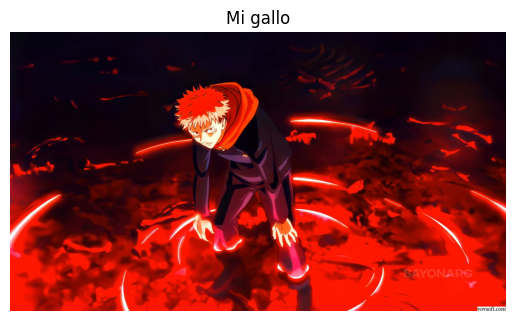

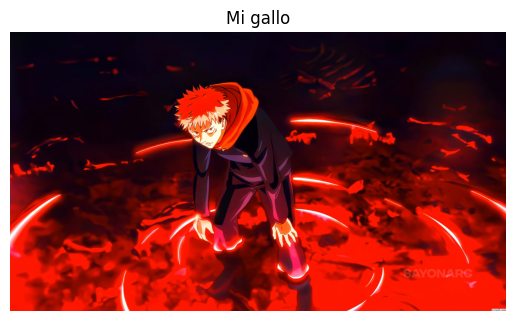

In [29]:
plot_image_from_tensor(myDataSet.__getitem__(1)[0])
plot_image_from_tensor(myDataSet.__getitem__(1)[1])

In [ ]:

#TODO create a model img to img, and test